In [2]:
import pandas as pd
df = pd.read_csv("/task 3 dataset.csv")
df.head()

,Event_Name,Event_Type,Department,Rating,Comment
0,AI Workshop,Workshop,AIML,5,Very informative and interactive session
1,AI Workshop,Workshop,AIML,4,Good examples and explanations
2,Cloud Computing Seminar,Seminar,CSE,3,Content was okay but a bit long
3,Cloud Computing Seminar,Seminar,CSE,2,Not very engaging
4,Data Science Bootcamp,Workshop,IT,5,Hands-on sessions were excellent


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Event_Name  24 non-null     object
 1   Event_Type  24 non-null     object
 2   Department  24 non-null     object
 3   Rating      24 non-null     int64 
 4   Comment     24 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.1+ KB


In [4]:
df.isnull().sum()

,0
Event_Name,0
Event_Type,0
Department,0
Rating,0
Comment,0


In [5]:
df["Comment"] = df["Comment"].fillna("")

In [6]:
df["Rating"].describe()

,Rating
count,24.000000
mean,3.750000
std,0.989071
min,2.000000
25%,3.000000
50%,4.000000
75%,4.250000
max,5.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

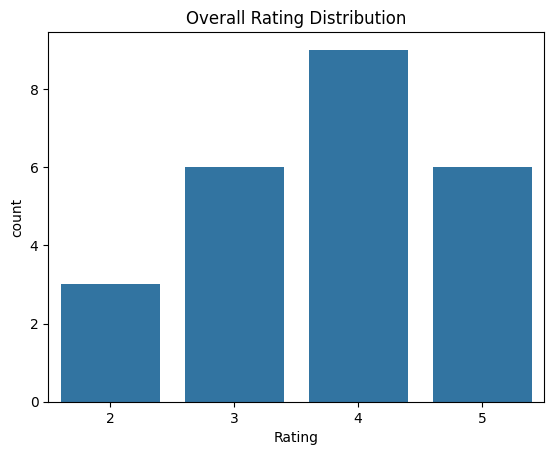

In [8]:
sns.countplot(x="Rating", data=df)
plt.title("Overall Rating Distribution")
plt.show()

In [10]:
top_events = df.groupby("Event_Name")["Rating"].mean().sort_values(ascending=False).head(3)
top_events

,Rating
Event_Name,
AI Workshop,4.5
Cultural Fest,4.5
ML Workshop,4.5


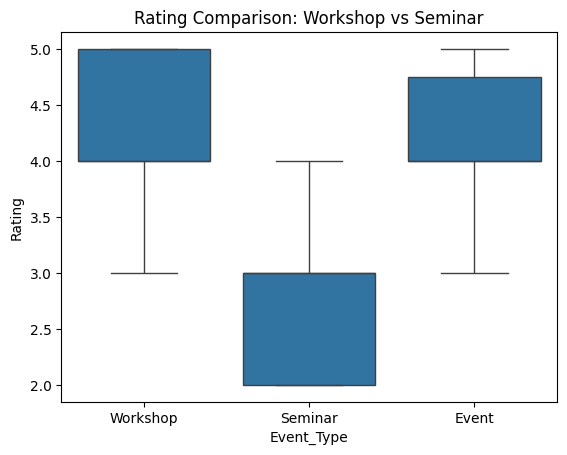

In [11]:
sns.boxplot(x="Event_Type", y="Rating", data=df)
plt.title("Rating Comparison: Workshop vs Seminar")
plt.show()

In [12]:
dept_ratings = df.groupby("Department")["Rating"].mean().sort_values(ascending=False)
dept_ratings

,Rating
Department,
AIML,4.5
Arts,4.5
IT,4.5
CSE,3.5
ECE,3.5
Mech,3.5
EEE,2.5
Management,2.5


In [13]:
!pip install textblob

In [14]:
from textblob import TextBlob

In [15]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

In [16]:
df["Sentiment"] = df["Comment"].apply(get_sentiment)
df.head()

,Event_Name,Event_Type,Department,Rating,Comment,Sentiment
0,AI Workshop,Workshop,AIML,5,Very informative and interactive session,Positive
1,AI Workshop,Workshop,AIML,4,Good examples and explanations,Positive
2,Cloud Computing Seminar,Seminar,CSE,3,Content was okay but a bit long,Positive
3,Cloud Computing Seminar,Seminar,CSE,2,Not very engaging,Negative
4,Data Science Bootcamp,Workshop,IT,5,Hands-on sessions were excellent,Positive


In [17]:
df["Sentiment"].value_counts()

,count
Sentiment,
Positive,18
Negative,3
Neutral,3


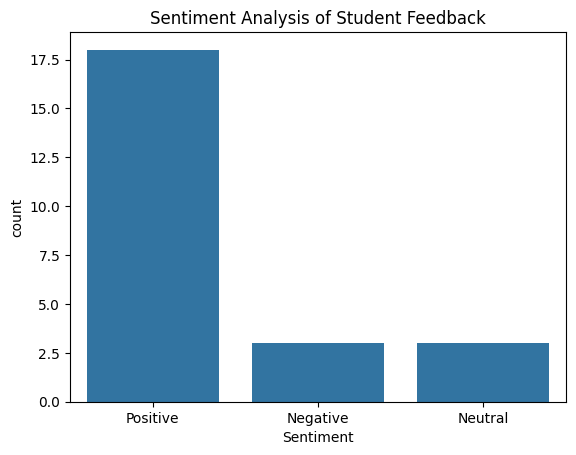

In [18]:
sns.countplot(x="Sentiment", data=df)
plt.title("Sentiment Analysis of Student Feedback")
plt.show()

In [19]:
!pip install wordCloud

In [20]:
from wordcloud import WordCloud

In [21]:
negative_text = "".join(df[df["Sentiment"] == "Negative"]["Comment"])

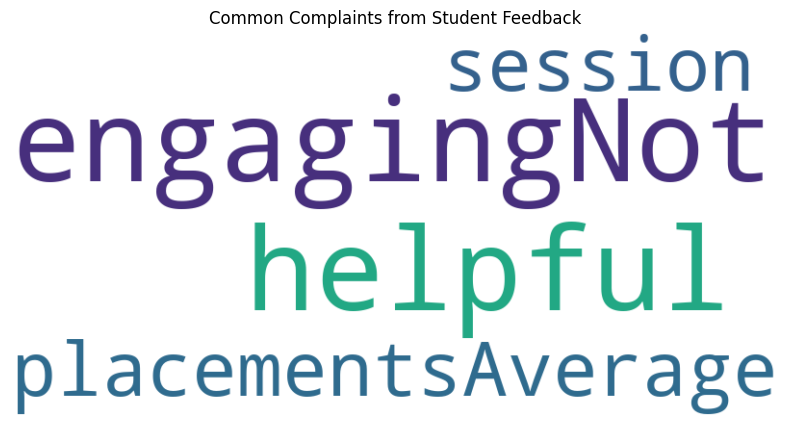

In [22]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Complaints from Student Feedback")
plt.show()